In [32]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("C:/Users/User/github/Quant/data/kospi_category.csv", encoding='cp949')

In [34]:
start_date = '2004-01-01'
end_date = '2020-03-01'
 
df.index = pd.date_range(start_date,end_date,freq='m')

In [35]:
df.drop('date',axis=1, inplace=True)

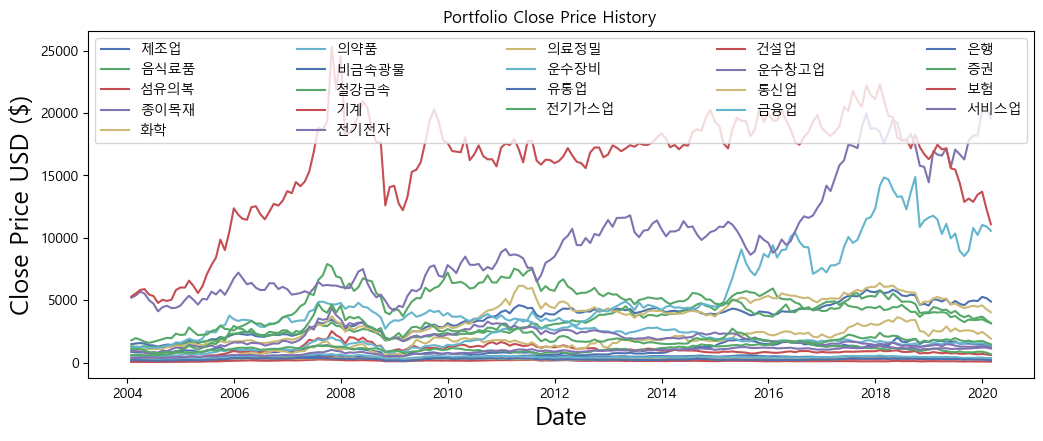

In [36]:
title = 'Portfolio Close Price History    '

#Get the stocks
my_stocks = df

#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5

# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc = 'upper right', mode = 'expand', ncol = 5)
plt.show()

In [37]:
returns = df.pct_change()
returns

,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
2004-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-29,0.036156,-0.021484,-0.006045,0.126518,0.083113,0.074691,-0.021670,0.097743,0.086890,0.033444,...,-0.003526,0.027870,0.042927,-0.028853,0.044388,0.077803,0.063243,0.048602,0.044860,0.036380
2004-03-31,0.020653,-0.011740,-0.049002,0.005074,-0.004730,-0.021993,-0.029926,-0.057165,0.012194,0.056788,...,-0.031618,-0.016719,0.001519,-0.059017,-0.070340,-0.048453,-0.076715,-0.050630,0.050562,0.056952
2004-04-30,-0.027754,0.060707,0.007120,-0.082229,0.025673,0.029165,0.035643,-0.095249,-0.098894,-0.026716,...,0.170097,-0.012699,0.007583,-0.097207,-0.055064,-0.036767,-0.025705,-0.063589,0.013168,0.071245
2004-05-31,-0.080380,-0.087235,-0.090702,-0.105040,-0.042056,-0.102412,-0.119328,-0.052510,-0.103163,-0.095124,...,0.049405,-0.030267,-0.107315,-0.034113,-0.029152,-0.088004,-0.059883,-0.152506,-0.074637,-0.040962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31,0.015333,-0.012564,-0.011562,-0.029449,0.022013,0.202028,-0.009742,-0.071455,-0.062860,0.024062,...,0.002777,-0.014341,-0.067692,0.011441,-0.021801,-0.003189,-0.105009,-0.050603,-0.020114,0.024572
2019-11-30,-0.008311,0.006155,0.019921,-0.023724,-0.017608,-0.052161,-0.025910,0.027802,-0.035665,-0.001156,...,0.015785,0.064026,-0.017777,0.014749,0.026438,0.027643,-0.003975,0.018484,0.044900,0.009132
2019-12-31,0.069469,0.014275,0.004866,-0.000999,0.025059,0.078333,0.014335,0.024208,0.042079,0.111118,...,0.037852,-0.002596,0.025621,0.023935,-0.008461,0.019900,0.004194,0.017745,0.017351,0.035805
2020-01-31,-0.021397,-0.053179,-0.104102,0.069189,-0.070628,-0.011667,-0.054239,-0.080560,-0.073875,0.009705,...,-0.052094,-0.093491,-0.080685,-0.059614,-0.047412,-0.091211,-0.088760,-0.082422,-0.105735,-0.013395


In [38]:
cov_matrix_annual = returns.cov() * 12
cov_matrix_annual

,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
제조업,0.034116,0.020061,0.026325,0.027799,0.033032,0.025671,0.030691,0.032562,0.044669,0.033515,...,0.028724,0.014658,0.041462,0.031530,0.007949,0.032250,0.028918,0.049827,0.025696,0.028015
음식료품,0.020061,0.035845,0.029321,0.022691,0.027272,0.031642,0.029627,0.023369,0.031351,0.010173,...,0.027657,0.018491,0.033154,0.027589,0.008230,0.025372,0.022175,0.037802,0.023331,0.025131
섬유의복,0.026325,0.029321,0.062527,0.034858,0.029453,0.033118,0.037755,0.032163,0.040641,0.017065,...,0.036927,0.019507,0.042623,0.034177,0.007202,0.032957,0.034007,0.046170,0.024876,0.029386
종이목재,0.027799,0.022691,0.034858,0.059086,0.028913,0.035094,0.043522,0.032802,0.042543,0.021506,...,0.028513,0.016075,0.046823,0.030106,0.009495,0.032813,0.031203,0.053096,0.021057,0.026675
화학,0.033032,0.027272,0.029453,0.028913,0.050597,0.033929,0.037784,0.038946,0.050742,0.018892,...,0.033318,0.017130,0.049744,0.038887,0.007750,0.033436,0.028819,0.050996,0.029343,0.036310
의약품,0.025671,0.031642,0.033118,0.035094,0.033929,0.085509,0.038128,0.027360,0.043047,0.014245,...,0.028720,0.018996,0.042492,0.032019,0.009817,0.030786,0.023046,0.050682,0.027919,0.030007
비금속광물,0.030691,0.029627,0.037755,0.043522,0.037784,0.038128,0.075756,0.038780,0.050129,0.019080,...,0.034128,0.019482,0.059239,0.035051,0.014004,0.034186,0.030638,0.056466,0.025717,0.030833
철강금속,0.032562,0.023369,0.032163,0.032802,0.038946,0.027360,0.038780,0.063578,0.049010,0.020377,...,0.032021,0.023544,0.050004,0.041894,0.011413,0.037515,0.037071,0.053548,0.028795,0.028893
기계,0.044669,0.031351,0.040641,0.042543,0.050742,0.043047,0.050129,0.049010,0.100971,0.029752,...,0.044537,0.018896,0.073887,0.057742,0.011019,0.045532,0.037070,0.075659,0.040459,0.044180
전기전자,0.033515,0.010173,0.017065,0.021506,0.018892,0.014245,0.019080,0.020377,0.029752,0.051554,...,0.019124,0.011279,0.026434,0.017896,0.007086,0.027552,0.024658,0.042927,0.019658,0.018930


In [39]:
weights = np.ones(22)
weights = weights/22
weights

array([0.04545455, 0.04545455, 0.04545455, 0.04545455, 0.04545455,
       0.04545455, 0.04545455, 0.04545455, 0.04545455, 0.04545455,
       0.04545455, 0.04545455, 0.04545455, 0.04545455, 0.04545455,
       0.04545455, 0.04545455, 0.04545455, 0.04545455, 0.04545455,
       0.04545455, 0.04545455])

In [40]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.0342868249996932

In [41]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.18516701920075615

In [42]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 12
portfolioSimpleAnnualReturn

0.0787027995137545

In [43]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 8.0%
Annual volatility/standard deviation/risk : 19.0%
Annual variance : 3.0%


In [44]:
import sys
sys.path.append("C:/Users/user/github/Quant/PyPortfolioOpt-master/pypfopt/")
sys.path.append("C:/Users/user/github/Quant/PyPortfolioOpt-master/pypfopt/efficient_frontier/")


In [48]:
import warnings

import numpy as np
import pandas as pd
import cvxpy as cp

import exceptions
import objective_functions, base_optimizer


class EfficientFrontier(base_optimizer.BaseConvexOptimizer):

    """
    An EfficientFrontier object (inheriting from BaseConvexOptimizer) contains multiple
    optimization methods that can be called (corresponding to different objective
    functions) with various parameters. Note: a new EfficientFrontier object should
    be instantiated if you want to make any change to objectives/constraints/bounds/parameters.

    Instance variables:

    - Inputs:

        - ``n_assets`` - int
        - ``tickers`` - str list
        - ``bounds`` - float tuple OR (float tuple) list
        - ``cov_matrix`` - np.ndarray
        - ``expected_returns`` - np.ndarray
        - ``solver`` - str
        - ``solver_options`` - {str: str} dict

    - Output: ``weights`` - np.ndarray

    Public methods:

    - ``min_volatility()`` optimizes for minimum volatility
    - ``max_sharpe()`` optimizes for maximal Sharpe ratio (a.k.a the tangency portfolio)
    - ``max_quadratic_utility()`` maximises the quadratic utility, given some risk aversion.
    - ``efficient_risk()`` maximises return for a given target risk
    - ``efficient_return()`` minimises risk for a given target return

    - ``add_objective()`` adds a (convex) objective to the optimization problem
    - ``add_constraint()`` adds a constraint to the optimization problem
    - ``convex_objective()`` solves for a generic convex objective with linear constraints

    - ``portfolio_performance()`` calculates the expected return, volatility and Sharpe ratio for
      the optimized portfolio.
    - ``set_weights()`` creates self.weights (np.ndarray) from a weights dict
    - ``clean_weights()`` rounds the weights and clips near-zeros.
    - ``save_weights_to_file()`` saves the weights to csv, json, or txt.
    """

    def __init__(
        self,
        expected_returns,
        cov_matrix,
        weight_bounds=(0, 1),
        solver=None,
        verbose=False,
        solver_options=None,
    ):
        """
        :param expected_returns: expected returns for each asset. Can be None if
                                optimising for volatility only (but not recommended).
        :type expected_returns: pd.Series, list, np.ndarray
        :param cov_matrix: covariance of returns for each asset. This **must** be
                           positive semidefinite, otherwise optimization will fail.
        :type cov_matrix: pd.DataFrame or np.array
        :param weight_bounds: minimum and maximum weight of each asset OR single min/max pair
                              if all identical, defaults to (0, 1). Must be changed to (-1, 1)
                              for portfolios with shorting.
        :type weight_bounds: tuple OR tuple list, optional
        :param solver: name of solver. list available solvers with: `cvxpy.installed_solvers()`
        :type solver: str
        :param verbose: whether performance and debugging info should be printed, defaults to False
        :type verbose: bool, optional
        :param solver_options: parameters for the given solver
        :type solver_options: dict, optional
        :raises TypeError: if ``expected_returns`` is not a series, list or array
        :raises TypeError: if ``cov_matrix`` is not a dataframe or array
        """
        # Inputs
        self.cov_matrix = EfficientFrontier._validate_cov_matrix(cov_matrix)
        self.expected_returns = EfficientFrontier._validate_expected_returns(
            expected_returns
        )
        self._max_return_value = None
        self._market_neutral = None

        if self.expected_returns is None:
            num_assets = len(cov_matrix)
        else:
            num_assets = len(expected_returns)

        # Labels
        if isinstance(expected_returns, pd.Series):
            tickers = list(expected_returns.index)
        elif isinstance(cov_matrix, pd.DataFrame):
            tickers = list(cov_matrix.columns)
        else:  # use integer labels
            tickers = list(range(num_assets))

        if expected_returns is not None and cov_matrix is not None:
            if cov_matrix.shape != (num_assets, num_assets):
                raise ValueError("Covariance matrix does not match expected returns")

        super().__init__(
            len(tickers),
            tickers,
            weight_bounds,
            solver=solver,
            verbose=verbose,
            solver_options=solver_options,
        )

    @staticmethod
    def _validate_expected_returns(expected_returns):
        if expected_returns is None:
            return None
        elif isinstance(expected_returns, pd.Series):
            return expected_returns.values
        elif isinstance(expected_returns, list):
            return np.array(expected_returns)
        elif isinstance(expected_returns, np.ndarray):
            return expected_returns.ravel()
        else:
            raise TypeError("expected_returns is not a series, list or array")

    @staticmethod
    def _validate_cov_matrix(cov_matrix):
        if cov_matrix is None:
            raise ValueError("cov_matrix must be provided")
        elif isinstance(cov_matrix, pd.DataFrame):
            return cov_matrix.values
        elif isinstance(cov_matrix, np.ndarray):
            return cov_matrix
        else:
            raise TypeError("cov_matrix is not a dataframe or array")

    def _validate_returns(self, returns):
        """
        Helper method to validate daily returns (needed for some efficient frontiers)
        """
        if not isinstance(returns, (pd.DataFrame, np.ndarray)):
            raise TypeError("returns should be a pd.Dataframe or np.ndarray")

        returns_df = pd.DataFrame(returns)
        if returns_df.isnull().values.any():
            warnings.warn(
                "Removing NaNs from returns",
                UserWarning,
            )
            returns_df = returns_df.dropna(axis=0, how="any")

        if self.expected_returns is not None:
            if returns_df.shape[1] != len(self.expected_returns):
                raise ValueError(
                    "returns columns do not match expected_returns. Please check your tickers."
                )

        return returns_df

    def _make_weight_sum_constraint(self, is_market_neutral):
        """
        Helper method to make the weight sum constraint. If market neutral,
        validate the weights proided in the constructor.
        """
        if is_market_neutral:
            #  Check and fix bounds
            portfolio_possible = np.any(self._lower_bounds < 0)
            if not portfolio_possible:
                warnings.warn(
                    "Market neutrality requires shorting - bounds have been amended",
                    RuntimeWarning,
                )
                self._map_bounds_to_constraints((-1, 1))
                # Delete original constraints
                del self._constraints[0]
                del self._constraints[0]

            self.add_constraint(lambda w: cp.sum(w) == 0)
        else:
            self.add_constraint(lambda w: cp.sum(w) == 1)
        self._market_neutral = is_market_neutral

    def min_volatility(self):
        """
        Minimise volatility.

        :return: asset weights for the volatility-minimising portfolio
        :rtype: OrderedDict
        """
        self._objective = objective_functions.portfolio_variance(
            self._w, self.cov_matrix
        )
        for obj in self._additional_objectives:
            self._objective += obj

        self.add_constraint(lambda w: cp.sum(w) == 1)
        return self._solve_cvxpy_opt_problem()

    def _max_return(self, return_value=True):
        """
        Helper method to maximise return. This should not be used to optimize a portfolio.

        :return: asset weights for the return-minimising portfolio
        :rtype: OrderedDict
        """
        if self.expected_returns is None:
            raise ValueError("no expected returns provided")

        self._objective = objective_functions.portfolio_return(
            self._w, self.expected_returns
        )

        self.add_constraint(lambda w: cp.sum(w) == 1)

        res = self._solve_cvxpy_opt_problem()

        if return_value:
            return -self._opt.value
        else:
            return res

    def max_sharpe(self, risk_free_rate=0.02):
        """
        Maximise the Sharpe Ratio. The result is also referred to as the tangency portfolio,
        as it is the portfolio for which the capital market line is tangent to the efficient frontier.

        This is a convex optimization problem after making a certain variable substitution. See
        `Cornuejols and Tutuncu (2006) <http://web.math.ku.dk/~rolf/CT_FinOpt.pdf>`_ for more.

        :param risk_free_rate: risk-free rate of borrowing/lending, defaults to 0.02.
                               The period of the risk-free rate should correspond to the
                               frequency of expected returns.
        :type risk_free_rate: float, optional
        :raises ValueError: if ``risk_free_rate`` is non-numeric
        :return: asset weights for the Sharpe-maximising portfolio
        :rtype: OrderedDict
        """
        if not isinstance(risk_free_rate, (int, float)):
            raise ValueError("risk_free_rate should be numeric")

        if max(self.expected_returns) <= risk_free_rate:
            raise ValueError(
                "at least one of the assets must have an expected return exceeding the risk-free rate"
            )

        self._risk_free_rate = risk_free_rate

        # max_sharpe requires us to make a variable transformation.
        # Here we treat w as the transformed variable.
        self._objective = cp.quad_form(self._w, self.cov_matrix)
        k = cp.Variable()

        # Note: objectives are not scaled by k. Hence there are subtle differences
        # between how these objectives work for max_sharpe vs min_volatility
        if len(self._additional_objectives) > 0:
            warnings.warn(
                "max_sharpe transforms the optimization problem so additional objectives may not work as expected."
            )
        for obj in self._additional_objectives:
            self._objective += obj

        new_constraints = []
        # Must rebuild the constraints
        for constr in self._constraints:
            if isinstance(constr, cp.constraints.nonpos.Inequality):
                # Either the first or second item is the expression
                if isinstance(
                    constr.args[0], cp.expressions.constants.constant.Constant
                ):
                    new_constraints.append(constr.args[1] >= constr.args[0] * k)
                else:
                    new_constraints.append(constr.args[0] <= constr.args[1] * k)
            elif isinstance(constr, cp.constraints.zero.Equality):
                new_constraints.append(constr.args[0] == constr.args[1] * k)
            else:
                raise TypeError(
                    "Please check that your constraints are in a suitable format"
                )

        # Transformed max_sharpe convex problem:
        self._constraints = [
            (self.expected_returns - risk_free_rate).T @ self._w == 1,
            cp.sum(self._w) == k,
            k >= 0,
        ] + new_constraints

        self._solve_cvxpy_opt_problem()
        # Inverse-transform
        self.weights = (self._w.value / k.value).round(16) + 0.0
        return self._make_output_weights()

    def max_quadratic_utility(self, risk_aversion=1, market_neutral=False):
        r"""
        Maximise the given quadratic utility, i.e:

        .. math::

            \max_w w^T \mu - \frac \delta 2 w^T \Sigma w

        :param risk_aversion: risk aversion parameter (must be greater than 0),
                              defaults to 1
        :type risk_aversion: positive float
        :param market_neutral: whether the portfolio should be market neutral (weights sum to zero),
                               defaults to False. Requires negative lower weight bound.
        :param market_neutral: bool, optional
        :return: asset weights for the maximum-utility portfolio
        :rtype: OrderedDict
        """
        if risk_aversion <= 0:
            raise ValueError("risk aversion coefficient must be greater than zero")

        update_existing_parameter = self.is_parameter_defined("risk_aversion")
        if update_existing_parameter:
            self._validate_market_neutral(market_neutral)
            self.update_parameter_value("risk_aversion", risk_aversion)
        else:
            self._objective = objective_functions.quadratic_utility(
                self._w,
                self.expected_returns,
                self.cov_matrix,
                risk_aversion=risk_aversion,
            )
            for obj in self._additional_objectives:
                self._objective += obj

            self._make_weight_sum_constraint(market_neutral)
        return self._solve_cvxpy_opt_problem()

    def efficient_risk(self, target_volatility, market_neutral=False):
        """
        Maximise return for a target risk. The resulting portfolio will have a volatility
        less than the target (but not guaranteed to be equal).

        :param target_volatility: the desired maximum volatility of the resulting portfolio.
        :type target_volatility: float
        :param market_neutral: whether the portfolio should be market neutral (weights sum to zero),
                               defaults to False. Requires negative lower weight bound.
        :param market_neutral: bool, optional
        :raises ValueError: if ``target_volatility`` is not a positive float
        :raises ValueError: if no portfolio can be found with volatility equal to ``target_volatility``
        :raises ValueError: if ``risk_free_rate`` is non-numeric
        :return: asset weights for the efficient risk portfolio
        :rtype: OrderedDict
        """
        if not isinstance(target_volatility, (float, int)) or target_volatility < 0:
            raise ValueError("target_volatility should be a positive float")

        global_min_volatility = np.sqrt(1 / np.sum(np.linalg.pinv(self.cov_matrix)))

        if target_volatility < global_min_volatility:
            raise ValueError(
                "The minimum volatility is {:.3f}. Please use a higher target_volatility".format(
                    global_min_volatility
                )
            )

        update_existing_parameter = self.is_parameter_defined("target_variance")
        if update_existing_parameter:
            self._validate_market_neutral(market_neutral)
            self.update_parameter_value("target_variance", target_volatility**2)
        else:
            self._objective = objective_functions.portfolio_return(
                self._w, self.expected_returns
            )
            variance = objective_functions.portfolio_variance(self._w, self.cov_matrix)

            for obj in self._additional_objectives:
                self._objective += obj

            target_variance = cp.Parameter(
                name="target_variance", value=target_volatility**2, nonneg=True
            )
            self.add_constraint(lambda _: variance <= target_variance)
            self._make_weight_sum_constraint(market_neutral)
        return self._solve_cvxpy_opt_problem()

    def efficient_return(self, target_return, market_neutral=False):
        """
        Calculate the 'Markowitz portfolio', minimising volatility for a given target return.

        :param target_return: the desired return of the resulting portfolio.
        :type target_return: float
        :param market_neutral: whether the portfolio should be market neutral (weights sum to zero),
                               defaults to False. Requires negative lower weight bound.
        :type market_neutral: bool, optional
        :raises ValueError: if ``target_return`` is not a positive float
        :raises ValueError: if no portfolio can be found with return equal to ``target_return``
        :return: asset weights for the Markowitz portfolio
        :rtype: OrderedDict
        """
        if not isinstance(target_return, float):
            raise ValueError("target_return should be a float")
        if not self._max_return_value:
            a = self.deepcopy()
            self._max_return_value = a._max_return()
        if target_return > self._max_return_value:
            raise ValueError(
                "target_return must be lower than the maximum possible return"
            )

        update_existing_parameter = self.is_parameter_defined("target_return")
        if update_existing_parameter:
            self._validate_market_neutral(market_neutral)
            self.update_parameter_value("target_return", target_return)
        else:
            self._objective = objective_functions.portfolio_variance(
                self._w, self.cov_matrix
            )
            ret = objective_functions.portfolio_return(
                self._w, self.expected_returns, negative=False
            )

            for obj in self._additional_objectives:
                self._objective += obj

            target_return_par = cp.Parameter(name="target_return", value=target_return)
            self.add_constraint(lambda _: ret >= target_return_par)
            self._make_weight_sum_constraint(market_neutral)
        return self._solve_cvxpy_opt_problem()

    def portfolio_performance(self, verbose=False, risk_free_rate=0.02):
        """
        After optimising, calculate (and optionally print) the performance of the optimal
        portfolio. Currently calculates expected return, volatility, and the Sharpe ratio.

        :param verbose: whether performance should be printed, defaults to False
        :type verbose: bool, optional
        :param risk_free_rate: risk-free rate of borrowing/lending, defaults to 0.02.
                               The period of the risk-free rate should correspond to the
                               frequency of expected returns.
        :type risk_free_rate: float, optional
        :raises ValueError: if weights have not been calculated yet
        :return: expected return, volatility, Sharpe ratio.
        :rtype: (float, float, float)
        """
        if self._risk_free_rate is not None:
            if risk_free_rate != self._risk_free_rate:
                warnings.warn(
                    "The risk_free_rate provided to portfolio_performance is different"
                    " to the one used by max_sharpe. Using the previous value.",
                    UserWarning,
                )
            risk_free_rate = self._risk_free_rate

        return base_optimizer.portfolio_performance(
            self.weights,
            self.expected_returns,
            self.cov_matrix,
            verbose,
            risk_free_rate,
        )

    def _validate_market_neutral(self, market_neutral: bool) -> None:
        if self._market_neutral != market_neutral:
            raise exceptions.InstantiationError(
                "A new instance must be created when changing market_neutral."
            )


In [46]:
import expected_returns
import risk_models


In [47]:
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

NameError: name 'returns_from_prices' is not defined